## Ashutosh Sahoo, Week-4

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
data = pd.read_csv('Data.csv')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 [':' nan nan]]


In [5]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' nan]


In [6]:
print(data)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10        :   NaN      NaN       NaN


## Taking care of missing data

In [7]:
#this is class 
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

In [8]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 [':' 38.77777777777778 63777.77777777778]]


## Encoding categorical data

### Encoding the Independent Variable

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [10]:
print(x)

[[0.0 1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 0.0 1.0 27.0 48000.0]
 [0.0 0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [0.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 0.0 37.0 67000.0]
 [1.0 0.0 0.0 0.0 38.77777777777778 63777.77777777778]]


### Encoding the Dependent Variable

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
print(y)

[0 1 0 0 1 1 0 1 0 1 2]


## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 1)

In [15]:
print(x_train)

[[0.0 1.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0 0.0 1.0 27.0 48000.0]
 [0.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 0.0 0.0 38.77777777777778 63777.77777777778]
 [0.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 0.0 35.0 58000.0]]


In [16]:
print(x_test)

[[0.0 0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 0.0 40.0 63777.77777777778]]


In [17]:
print(y_train)

[1 1 0 0 1 2 0 1]


In [18]:
print(y_test)

[0 0 1]


## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.transform(x_test[:, 3:])

In [20]:
print(x_train)

[[0.0 1.0 0.0 -0.5773502691896258 -0.4060397938497913 0.14221361637429802]
 [0.0 0.0 0.0 1.7320508075688774 -1.8461809345978202 -1.4926454357268726]
 [0.0 0.0 0.0 1.7320508075688774 -0.15001470216125268 -1.148464582652942]
 [0.0 1.0 0.0 -0.5773502691896258 0.602059004673829 0.5724396827167113]
 [0.0 1.0 0.0 -0.5773502691896258 1.1781154609730407 1.17475617559609]
 [1.0 0.0 0.0 -0.5773502691896258 -0.15001470216125268
  -0.13504318193525697]
 [0.0 0.0 1.0 -0.5773502691896258 1.4661436891226463 1.5189370286700206]
 [0.0 1.0 0.0 -0.5773502691896258 -0.694068021999397 -0.632193303042046]]


In [21]:
print(x_test)

[[0.0 0.0 1.0 -0.5773502691896258 -1.4141385923734116 -0.9763741561159767]
 [0.0 0.0 0.0 1.7320508075688774 -0.26202567977498836
  -0.37405766323659795]
 [0.0 0.0 1.0 -0.5773502691896258 0.026002548374617417
  -0.13504318193525697]]


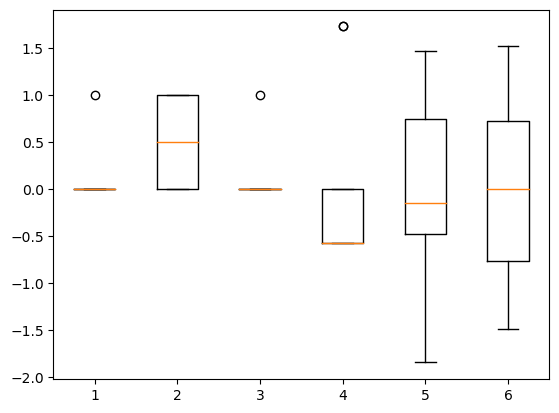

In [22]:
#outliers graph print karte hai 
plt.boxplot(x_train)
plt.show()
